## Assignment 1 

This assignment is based on the video discussed in module 1.

John Rauser ( 2014). Statistics Without the Agonizing Pain. Strata Hadoop 2014. Retrieved from https://www.youtube.com/watch?v=5Dnw46eC-0o

(Source: https://www.youtube.com/watch?v=5Dnw46eC-0o )




 
  
 

## Learning outcomes

- Use code to work with data
- Calculate basic statistical measures 
- Implement a data simulation by using resampling 


**Question**

1. Using the dataset from the video ( _mosquitos_data.csv_) in the folder, write Python code to:

    - Create side-by-side boxplots for the number of mosquitos in each group ( _beer vs water) 
    - What does the graph reveal about the data for both groups?  Is there an association between beer       consumption and attractiveness to mosquitos.
    - Calculate basic statistics measures for each group: Mean, median, standard deviation and explain the numbers.

2. Write code to implement the data simulation demonstrated in the above mentioned video.  Calculate the probability of obtaining the experiment outcome assuming no association between beer consumption.

## Hints

- Use pandas, matplotlib, or seaborn to plot boxplots in Python. 
- Label the graphs wherever applicable e.g, title, legend, units etc.





In [1]:
#your work here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
url = 'mosquitos_data.csv'

testdata = pd.read_csv(url)

In [3]:
Beer=testdata.Response.loc[testdata['Treatment']=='Beer'].values
Beer

array([27, 20, 21, 26, 27, 31, 24, 21, 20, 19, 23, 24, 28, 19, 24, 29, 18,
       20, 17, 31, 20, 25, 28, 21, 27], dtype=int64)

In [4]:
Water=testdata.Response.loc[testdata['Treatment']=='Water'].values
Water

array([21, 22, 15, 12, 21, 16, 19, 15, 22, 24, 19, 23, 13, 22, 20, 24, 18,
       20], dtype=int64)

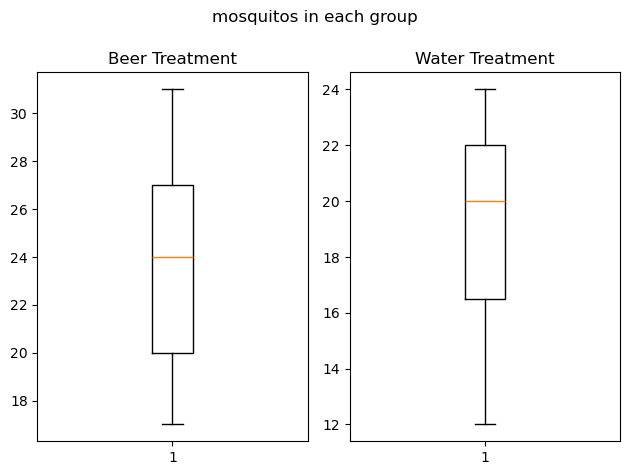

In [5]:
# Using subplot()
fig = plt.figure()

ax1 = fig.add_subplot(121) # (rows,col,index)
ax1.boxplot(Beer)
ax1.set_title('Beer Treatment')


ax2 = fig.add_subplot(122)
ax2.boxplot(Water)
ax2.set_title('Water Treatment')



fig.suptitle("mosquitos in each group")
fig.tight_layout()
fig.subplots_adjust(top=0.85)
# Show all subplots together
plt.show()

In [12]:
'''
It may be the 'shuffle()' method from 'numpy.random'. For two arrays 'array1' of length 25 and 'array2' of length 18 we may:
1. concatenate them to form a combined array
2. shuffle combined array: numpy.random.shuffle(combined)
3. split the shuffled array into two arrays of length 25 and 18. Now we have a new 'experiment'. Calculate the mean for each array and take the difference.
4. repeat approximately 10,000 times and count number of simulations with difference >= 4.4.
'''
combined=testdata.Response.values
combined


array([15, 20, 15, 26, 19, 29, 20, 18, 24, 18, 23, 27, 20, 17, 31, 21, 24,
       20, 19, 27, 21, 20, 13, 24, 28, 20, 28, 12, 25, 21, 22, 19, 22, 24,
       21, 31, 24, 21, 16, 22, 19, 27, 23], dtype=int64)

In [42]:
# Initialize variables

trials = 10000
repeat = []
combined=testdata.Response.values

# Simulation loop
for i in range(1, trials + 1):
    np.random.shuffle(combined)
    array_25 = combined[:25]
    array_18 = combined[25:]
    difference = array_25.mean() - array_18.mean()
    rounded_difference = round(difference, 1)
    repeat.append(rounded_difference)
repeat_array=np.array(repeat)
difference_bigger=np.sum(repeat_array>=4.4)
change_bigger=difference_bigger/trials
percent=difference_bigger/trials*100
print("Number of values greater than 4.4:", difference_bigger)
print("% of values greater than or equal to 4.4: {:.2f}%".format(percent))


Number of values greater than 4.4: 5
% of values greater than or equal to 4.4: 0.05%


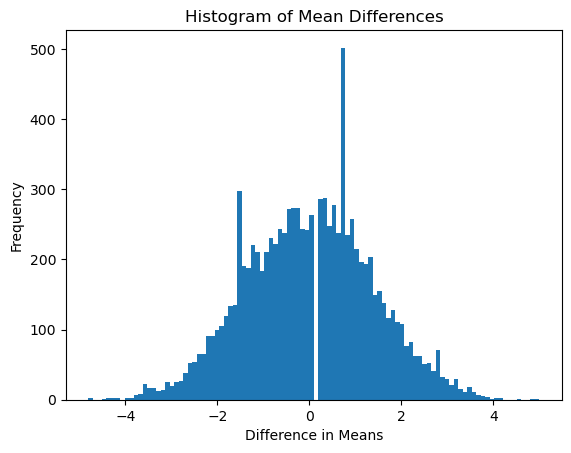

In [41]:
# Plotting results
plt.hist(repeat,bins=100)
plt.xlabel("Difference in Means")
plt.ylabel("Frequency")
plt.title("Histogram of Mean Differences")
plt.show()